Mounted at /content/drive
Shape of data1: (3676, 192)
Shape of data2: (833, 192)
Shape of data3: (11309, 192)
Shape of data4: (4826, 192)
Shape of data5: (3569, 192)
Shape of data6: (2998, 192)


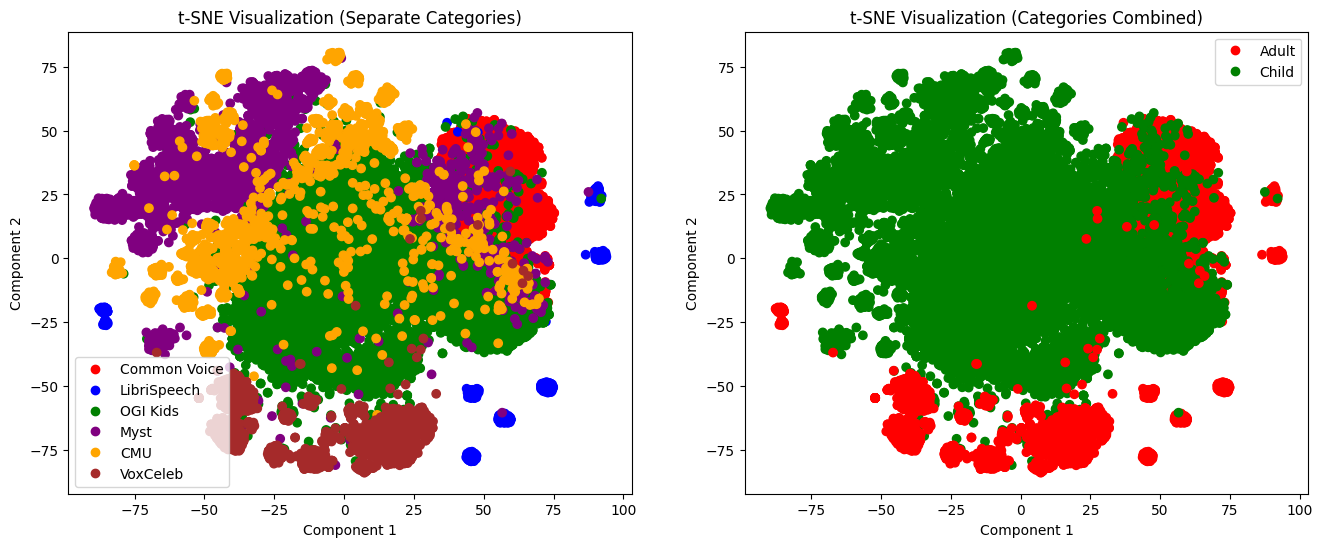

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the data from .npy files
try:
    data1 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/MozillaEmbeddingsSpeechBrain.npy')    # Category 1
    data2 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/LibrispeechEmbeddingsSpeechBrain.npy')   # Category 2
    data3 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/OGIKidsEmbeddingsSpeechBrain.npy')       # Category 3
    data4 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/mystEmbeddingsSpeechBrain.npy')          # Category 4
    data5 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/cmuEmbeddingsSpeechBrain.npy')           # Category 5
    data6 = np.load('/content/drive/MyDrive/UC_COSMOS/Embeddings/voxcelebEmbeddingsSpeechBrain.npy')      # Category 6
except Exception as e:
    print(f"Error loading files: {e}")
    raise

# Check the shapes of the loaded data
print("Shape of data1:", data1.shape)
print("Shape of data2:", data2.shape)
print("Shape of data3:", data3.shape)
print("Shape of data4:", data4.shape)
print("Shape of data5:", data5.shape)
print("Shape of data6:", data6.shape)

# Concatenate all datasets
data_combined = np.concatenate((data1, data2, data3, data4, data5, data6), axis=0)

# Separate labels: Six distinct categories
labels_separate = np.array(
    [0] * data1.shape[0] +
    [1] * data2.shape[0] +
    [2] * data3.shape[0] +
    [3] * data4.shape[0] +
    [4] * data5.shape[0] +
    [5] * data6.shape[0]
)

# Combined labels:
# Group (data1, data2, data6) into one category: label 0
# Group (data3, data4, data5) into another category: label 1
labels_combined = np.array(
    [0] * data1.shape[0] +   # data1
    [0] * data2.shape[0] +   # data2
    [1] * data3.shape[0] +   # data3
    [1] * data4.shape[0] +   # data4
    [1] * data5.shape[0] +   # data5
    [0] * data6.shape[0]     # data6
)

# Initialize t-SNE with 2 components for 2D plotting
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data for separate visualization
data_tsne_separate = tsne.fit_transform(data_combined)

# For combined visualization, we run t-SNE again
tsne_combined = TSNE(n_components=2, random_state=0)
data_tsne_combined = tsne_combined.fit_transform(data_combined)

# Plotting both t-SNE visualizations side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for separate categories (Six distinct categories)
colors_separate = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
cmap_separate = ListedColormap(colors_separate)
scatter_separate = axs[0].scatter(data_tsne_separate[:, 0], data_tsne_separate[:, 1],
                                  c=labels_separate, cmap=cmap_separate, marker='o')
axs[0].set_title('t-SNE Visualization (Separate Categories)')
axs[0].set_xlabel('Component 1')
axs[0].set_ylabel('Component 2')
axs[0].legend(handles=scatter_separate.legend_elements()[0],
              labels=['Common Voice', 'LibriSpeech', 'OGI Kids',
                      'Myst', 'CMU', 'VoxCeleb'])

# Plot for combined categories (Category 1,2,6 vs. Category 3,4,5)
colors_combined = ['red', 'green']
cmap_combined = ListedColormap(colors_combined)
scatter_combined = axs[1].scatter(data_tsne_combined[:, 0], data_tsne_combined[:, 1],
                                  c=labels_combined, cmap=cmap_combined, marker='o')
axs[1].set_title('t-SNE Visualization (Categories Combined)')
axs[1].set_xlabel('Component 1')
axs[1].set_ylabel('Component 2')
axs[1].legend(handles=scatter_combined.legend_elements()[0],
              labels=['Adult', 'Child'])

plt.show()
